In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import dump
from joblib import load
import cv2
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Maximum number of epochs
max_epochs = 10

In [3]:
# Load CSV file
data = pd.read_csv('../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

In [4]:
# Separate features and labels
X = data['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
X = np.vstack(X.values)
y_age = data['age']
y_gender = data['gender']

In [5]:
# Split data into training and testing sets
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(
    X, y_age, y_gender, test_size=0.2, random_state=42
)

In [6]:
# Train SVM for age prediction
age_svm = SVC()

In [7]:
epoch = 0
while epoch < max_epochs:
    age_svm.fit(X_train, y_age_train)
    age_predictions = age_svm.predict(X_test)
    age_accuracy = accuracy_score(y_age_test, age_predictions)
    print(f'Epoch {epoch + 1}, Age Accuracy: {age_accuracy * 100:.2f}%')

    # Set the early stopping conditions based on accuracy and max epochs
    if age_accuracy >= 0.95:
        print("Age training achieved satisfactory accuracy. Stopping age training.")
        break

    epoch += 1

print("Age model training completed successfully")

Epoch 1, Age Accuracy: 14.09%
Epoch 2, Age Accuracy: 14.09%
Epoch 3, Age Accuracy: 14.09%
Epoch 4, Age Accuracy: 14.09%
Epoch 5, Age Accuracy: 14.09%
Epoch 6, Age Accuracy: 14.09%
Epoch 7, Age Accuracy: 14.09%
Epoch 8, Age Accuracy: 14.09%
Epoch 9, Age Accuracy: 14.09%
Epoch 10, Age Accuracy: 14.09%
Age model training completed successfully


In [8]:
# Save age model to a file
dump(age_svm, 'age_model.h5')

['age_model.h5']

In [9]:
age_model = load('./age_model.h5')

In [10]:
# Define age groups
age_labels = {
    0: "(0-17)",
    1: "(18-32)",
    2: "(33-55)",
    3: "(56-75)",
    4: "(76-99)",
}

def age_groups(age):
    if age>=0 and age<18:
        return 0
    elif age<33:
        return 1
    elif age<56:
        return 2
    elif age<76:
        return 3
    else:
        return 4

Predicted_Age: (18-32)


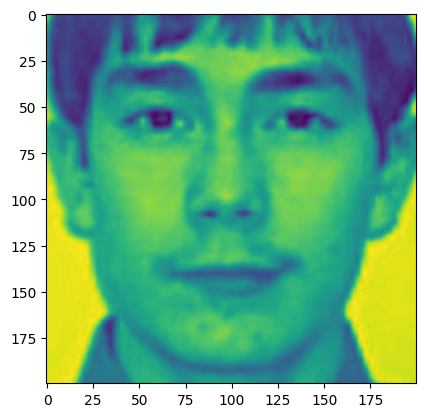

In [11]:
img_path = '../input/utkface-new/crop_part1/19_0_2_20170102234958195.jpg.chip.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
# Resize the face region to match the training data dimensions
resized_face = cv2.resize(img, (48, 48))
# Flatten the resized face
face_pixels = resized_face.flatten()
# Use the SVM models to predict age
predicted_age = age_model.predict([face_pixels])[0]
predicted_age_group = age_labels.get(age_groups(predicted_age), "Unknown")
print("Predicted_Age:",predicted_age_group)

Predicted_Age: (0-17)


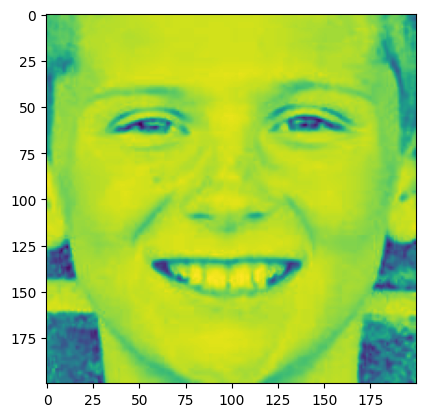

In [21]:
img_path = '../input/utkface-new/crop_part1/10_0_0_20170110220557169.jpg.chip.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
# Resize the face region to match the training data dimensions
resized_face = cv2.resize(img, (48, 48))
# Flatten the resized face
face_pixels = resized_face.flatten()
# Use the SVM models to predict age
predicted_age = age_model.predict([face_pixels])[0]
predicted_age_group = age_labels.get(age_groups(predicted_age), "Unknown")
print("Predicted_Age:",predicted_age_group)

In [14]:
# Train SVM for gender prediction
gender_svm = SVC()

In [15]:
epoch = 0
while epoch < max_epochs:
    gender_svm.fit(X_train, y_gender_train)
    gender_predictions = gender_svm.predict(X_test)
    gender_accuracy = accuracy_score(y_gender_test, gender_predictions)
    print(f'Epoch {epoch + 1}, Gender Accuracy: {gender_accuracy * 100:.2f}%')

    # Set the early stopping conditions based on accuracy and max epochs
    if gender_accuracy >= 0.95:
        print("Gender training achieved satisfactory accuracy. Stopping age training.")
        break

    epoch += 1

print("Gender model training completed successfully")

Epoch 1, Gender Accuracy: 87.20%
Epoch 2, Gender Accuracy: 87.20%
Epoch 3, Gender Accuracy: 87.20%
Epoch 4, Gender Accuracy: 87.20%
Epoch 5, Gender Accuracy: 87.20%
Epoch 6, Gender Accuracy: 87.20%
Epoch 7, Gender Accuracy: 87.20%
Epoch 8, Gender Accuracy: 87.20%
Epoch 9, Gender Accuracy: 87.20%
Epoch 10, Gender Accuracy: 87.20%
Gender model training completed successfully


In [16]:
# Save gender model to a file
dump(gender_svm, 'gender_model.h5')

['gender_model.h5']

In [17]:
gender_model = load('./gender_model.h5')

Predicted_Gender: Male


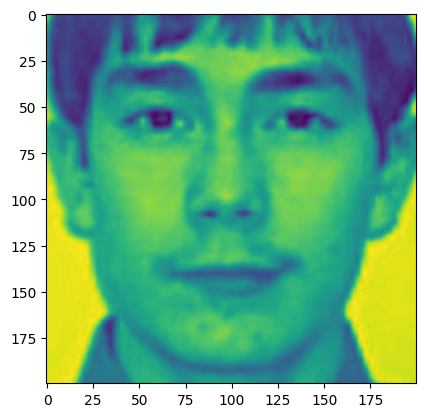

In [18]:
img_path = '../input/utkface-new/crop_part1/19_0_2_20170102234958195.jpg.chip.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
# Resize the face region to match the training data dimensions
resized_face = cv2.resize(img, (48, 48))
# Flatten the resized face
face_pixels = resized_face.flatten()
# Use the SVM models to predict gender
predicted_gender = "Male" if gender_svm.predict([face_pixels])[0] == 0 else "Female"
print("Predicted_Gender:",predicted_gender)

Predicted_Gender: Female


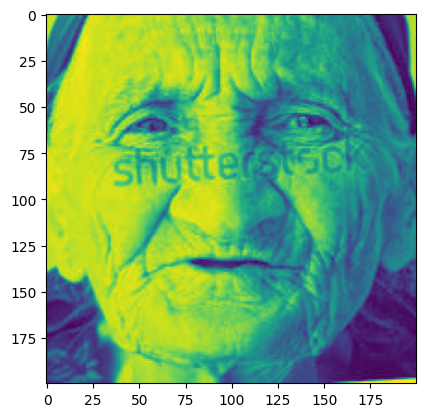

In [19]:
img_path = '../input/utkface-new/crop_part1/100_1_0_20170110183726390.jpg.chip.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
# Resize the face region to match the training data dimensions
resized_face = cv2.resize(img, (48, 48))
# Flatten the resized face
face_pixels = resized_face.flatten()
# Use the SVM models to predict gender
predicted_gender = "Male" if gender_svm.predict([face_pixels])[0] == 0 else "Female"
print("Predicted_Gender:",predicted_gender)